# Lab 4 - Clustering


- Your name: Đào Quang Duy

- Your student code: 21110398

### 1.1. Tìm hiểu tổng quan về dữ liệu

Phần này sẽ dùng tập dữ liệu `iris.csv` để minh họa.

#### 1.1.1. Load dữ liệu

In [1]:
import pandas as pd

# Đọc dữ liệu từ "iris.csv"
iris = pd.read_csv('./data/iris.csv')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 1.1.2. Tập dữ liệu Iris

`sepal_length`: chiều dài đài hoa (cm)

`sepal_width`: chiều rộng đài hoa (cm)

`petal_length`: chiều dài cánh hoa (cm)

`petal_width`: chiều rộng cánh hoa (cm)

`class/label`: loại hoa

![Iris dataset](./image/iris.png)

#### 1.1.3. Xem các loại biến trong tập dữ liệu

In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 1.1.4. Chuyển cột `class` (kiểu string) thành `label` (kiểu int)

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

iris['class'] = le.fit_transform(iris['class'])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Sử dụng thuật toán gom cụm Kmeans
Tham khảo:

1. [Kmeans User Guides](https://scikit-learn.org/stable/modules/clustering.html#k-means)

2. [Kmeans API Docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

### 2.1 Áp dụng thuật toán `KMeans` trên `iris` data với `n_clusters = 3`, `max_iter = 100`

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, max_iter = 100)

#  Call fit on the estimator and pass in iris
X = iris[iris.columns[0:4]]
model = kmeans.fit(X)

# Obtain the cluster centers from the KMeans model
centers = model.cluster_centers_
print(centers)

# Obtain the cluster predictions from the KMeans model
predictions = model.labels_
print(predictions)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### 2.2. Đánh giá kết quả gom cụm.

- Tạo [contingency_matrix](https://en.wikipedia.org/wiki/Contingency_matrix) từ kết quả gán cụm của mô hình (labels_pred) và nhãn cụm thật sự (labels_true).

- Tính giá trị [rand index](https://en.wikipedia.org/wiki/Rand_index) của kết quả gom cụm

- Tính giá trị [silhouette](https://en.wikipedia.org/wiki/Silhouette) của kết quả gom cụm

In [5]:
from sklearn.metrics import cluster
from sklearn import metrics

labels_true = iris['class'].to_numpy()
labels_pred = predictions

cm = cluster.contingency_matrix(labels_true, labels_pred)
print("Contingency_matrix: \n" + str(cm))

adjusted_rand_score = cluster.adjusted_rand_score(labels_true, labels_pred)
print("Rand index = " + str(adjusted_rand_score))

silhouette = metrics.silhouette_score(X, labels_pred, metric = 'euclidean')
print("Silhouette = " + str(silhouette))

Contingency_matrix: 
[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]
Rand index = 0.7302382722834697
Silhouette = 0.5525919445499757


### 2.3. Tính F-mearure của kết quả gom cụm dùng true label

Giả sử tập dữ liệu $D$ có $n$ phần tử $x_i$ được phân hoạch thành $p$ nhóm (ở đây ứng với số loài). Gọi $y_i \in \{1, 2, · · · , p\}$ là nhóm thật sự (ground-truth labels) cho mỗi phần tử. Ground-truth clustering được cho bởi $T = \{T_1, T_2, \cdots , T_p\}$, với $T_j$ bao gồm tất cả các phần tử có nhãn $j$, nghĩa là, $T_j = \{ x_i \in D | y_i = j \}$. Mặt khác, gọi $C = \{ C_1, C_2, \cdots, C_k \}$ là một kết quả gom cụm của $D$ thành $k$ cụm (cluster), qua một thuật toán gom cụm nào đó, và $\hat{y_i} \in \{ 1, 2, \cdots, k \}$ là cluster label cho $x_i$. Ta sẽ xem $T$ là một phân hoạch chuẩn (ground-truth partitioning) và mỗi $T_i$ là một phân vùng (partition). Ta gọi $C$ là một kết quả gom cụm (clustering), với mỗi $C_i$ là một cụm (cluster). Giả sử ground truth là biết trước, một thuật toán gom cụm sẽ thực hiện gom cụm trên $D$ với số cụm chính xác, tức với $k = p$. Tuy nhiên, để giữ tính tổng quát, ta cho phép $k \ne p$.

| Clusters/Species | $T_1$ | $T_2$  | $\cdots$ | $T_p$ |
|---|---|---|---|---|
| $C_1$ | $n_{11}$ | $n_{12}$ | $\cdots$ | $n_{1p}$ |
| $C_2$ | $n_{21}$ | $n_{22}$ | $\cdots$ | $n_{2p}$ |
| $\vdots$ | $\vdots$ | $\vdots$ | $\ddots$ | $\vdots$ |
| $C_k$ | $n_{k1}$ | $n_{k2}$ | $\cdots$ | $n_{kp}$ |

Các độ đo đánh giá kết quả gom cụm cố gắng nắm bắt mức độ mà các phần tử từ cùng một phân vùng (partition) xuất hiện trong cùng một cụm (cluster) và mức độ mà các phần tử từ các phân vùng (partition) khác nhau được nhóm thành các cụm (cluster) khác nhau. Những độ đo này dựa trên $k \times p$ contingency table $N$ (xem bảng trên) được thành lập dựa vào một kết quả gom cụm (clustering) $C$ và một phân hoạch chuẩn (ground-truth partitioning) $T$, được định nghĩa như sau:

$$N(i, j) = n_{ij} = |C_i \cap T_j|$$

- $Recall$ là tỷ lệ đối tượng cùng loài được gán cùng cụm. 

- $Precision$ là tỷ lệ đối tượng được gán cùng cụm thuộc cùng loài. 

- $F{\text -}measure$ là một độ đo cân bằng giữa $Precision$ và $Recall$ và được tính bằng trung bình điều hòa giữa $Precision$ và $Recall$. Đây là một độ đo thường được sử dụng để so sánh các thuật toán gom cụm với nhau.

Các độ đo $Precision$, $Recall$, và $F{\text -}measure$ được tính từ contingency table ở trên dùng các công thức sau:


\begin{equation}
precision = \frac{{\sum\limits_{i = 1}^k {\mathop {{\rm{max}}}\limits_{j \in \left\{ {1, \ldots p} \right\}} \{n_{ij}\} } }}{{\sum\limits_{i = 1}^k {\sum\limits_{j = 1}^p {n_{ij} } } }}
\end{equation}

\begin{equation}
recall = \frac{{\sum\limits_{j = 1}^p {\mathop {{\rm{max}}}\limits_{i \in \left\{ {1, \ldots ,k} \right\}} \{n_{ij}\} } }}{{\sum\limits_{i = 1}^k {\sum\limits_{j = 1}^p {n_{ij} } } }}
\end{equation}

\begin{equation}
\begin{split}
F{\text -}measure = \frac{{2 \cdot precision \cdot recall}}{{precision + recall}}
\end{split}
\end{equation}

In [6]:
# Viết code của bạn ở đây
from sklearn.metrics.cluster import contingency_matrix
import numpy as np

def precision(labels_true, labels_pred):
    cm = contingency_matrix(labels_true, labels_pred)
    t = np.sum(np.max(cm, axis=0))
    m = np.sum(cm)
    return t/m


def recall(labels_true, labels_pred):
    cm = contingency_matrix(labels_true, labels_pred)
    t = np.sum(np.max(cm, axis=1))
    m = np.sum(cm)
    return t/m


def fmeasure(labels_true, labels_pred):
    a = precision(labels_true, labels_pred)
    b = recall(labels_true, labels_pred)
    return (2*a*b)/(a+b)

    

In [7]:
labels_true = ["a", "a", "a", "b", "b", "b"]
labels_pred = [0, 0, 1, 1, 2, 2]
cm = contingency_matrix(labels_true, labels_pred)
print("Contingency_matrix: \n" + str(cm))

Contingency_matrix: 
[[2 1 0]
 [0 1 2]]


In [8]:
# test your code
prec = precision(labels_true, labels_pred)
print("Contingency_matrix: \n" + str(prec))

rec = recall(labels_true, labels_pred)
print("Contingency_matrix: \n" + str(rec))

fm = fmeasure(labels_true, labels_pred)
print("Contingency_matrix: \n" + str(fm))

Contingency_matrix: 
0.8333333333333334
Contingency_matrix: 
0.6666666666666666
Contingency_matrix: 
0.7407407407407408


## 3. Áp dụng `Kmeans` với tập dữ liệu `iris`

### 3.1. Áp dụng `Kmeans` cho tập dữ liệu `iris` chỉ dùng 2 thuộc tính `sepal_length` và `sepal_width`

Thiết lập các giá trị siêu tham số `n_clusters = 3`, `maxIter = 100`. 

In [9]:
# Viết code của bạn ở đây
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, max_iter = 100)

#  Call fit on the estimator and pass in iris
X = iris[iris.columns[0:2]]
model = kmeans.fit(X)

# Obtain the cluster centers from the KMeans model
centers = model.cluster_centers_
print(centers)

# Obtain the cluster predictions from the KMeans model
predictions = model.labels_
print(predictions)

[[5.006      3.418     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


### 3.2. Đánh giá kết quả gom cụm

- Tạo [contingency_matrix](https://en.wikipedia.org/wiki/Contingency_matrix) từ kết quả gán cụm của mô hình (labels_pred) và nhãn cụm thật sự (labels_true).

- Tính giá trị [rand index](https://en.wikipedia.org/wiki/Rand_index) của kết quả gom cụm

- Tính giá trị [silhouette](https://en.wikipedia.org/wiki/Silhouette) của kết quả gom cụm

- Tính giá trị [F-measure]() (theo định nghĩa ở mục 2.3 ở trên) của kết quả gom cụm

In [10]:
# Viết code của bạn ở đây
from sklearn.metrics import cluster
from sklearn import metrics

labels_true = iris['class'].to_numpy()
labels_pred = predictions

cm = cluster.contingency_matrix(labels_true, labels_pred)
print("Contingency_matrix: \n" + str(cm))

adjusted_rand_score = cluster.adjusted_rand_score(labels_true, labels_pred)
print("Rand index = " + str(adjusted_rand_score))

silhouette = metrics.silhouette_score(X, labels_pred, metric = 'euclidean')
print("Silhouette = " + str(silhouette))

prec = precision(labels_true, labels_pred)
print("Contingency_matrix: \n" + str(prec))

rec = recall(labels_true, labels_pred)
print("Contingency_matrix: \n" + str(rec))

fm = fmeasure(labels_true, labels_pred)
print("Contingency_matrix: \n" + str(fm))

Contingency_matrix: 
[[50  0  0]
 [ 0 12 38]
 [ 0 35 15]]
Rand index = 0.6006861021484542
Silhouette = 0.4434693231245126
Contingency_matrix: 
0.82
Contingency_matrix: 
0.82
Contingency_matrix: 
0.82


### 3.3. Trực quan hóa kết quả gom cụm dùng thư viện `matplotlib`. 
Tham khảo: [python-machine-learning-book-chapter10-notebook](https://github.com/rasbt/machine-learning-book/blob/main/ch10/ch10.ipynb).

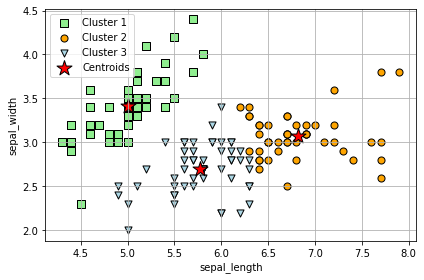

In [11]:
# Viết code của bạn ở đây
import matplotlib.pyplot as plt
y_km = predictions
plt.scatter(X.loc[y_km == 0, X.columns[0]].values,
            X.loc[y_km == 0, X.columns[1]].values,
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X.loc[y_km == 1, X.columns[0]].values,
            X.loc[y_km == 1, X.columns[1]].values,
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X.loc[y_km == 2, X.columns[0]].values,
            X.loc[y_km == 2, X.columns[1]].values,
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('figures/10_02.png', dpi=300)
plt.show()

## 4. Áp dụng `AgglomerativeClustering` trên tập dữ liệu `iris`

Thực lại các bước ở mục 3 trên tập dữ liệu iris với thuật toán AgglomerativeClustering. AgglomerativeClustering là một thuật toán thuộc nhóm [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) và theo cách tiếp cận bottom-up. 

Tham khảo: 

1. [AgglomerativeClustering User Guides](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

2. [AgglomerativeClustering API Documentations](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

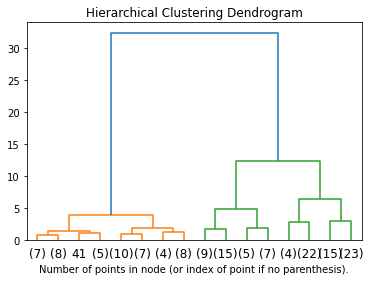

In [12]:
# Viết code của bạn ở đây
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## 5. Áp dụng `BisectingKmeans` trên tập dữ liệu `iris`

Thực lại các bước ở mục 3 trên tập dữ liệu iris với thuật toán BisectingKmeans. BisectingKmeans là một thuật toán thuộc nhóm [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) và theo cách tiếp cận top-down. 

Tham khảo: 

1. [BisectingKmeans User Guides](https://scikit-learn.org/stable/modules/clustering.html#bisecting-k-means)

2. [BisectingKmeans API Documentations](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html#sklearn.cluster.BisectingKMeans)

**Bisecting Kmeans** là một thuật toán gọm cụm thuộc nhóm **hierarchical clustering**. Khác với thuật toán **AgglomerativeClustering** tiếp cận theo hướng **bottom-up**, thuật toán **Bisecting Kmeans** tiếp cận theo hướng **top-down**.

**Ý tưởng của thuật toán Bisecting Kmeans**

Thuật toán khởi đầu bằng việc xem tất cả các điểm dữ liệu thuộc cùng một cụm và sau đó tiến hành như sau:

1. Chọn một cụm để tách
2. Tách cụm đã chọn thành 2 `sub-clusters` dùng thuật toán `K-means`. (`bisecting step`) 
3. Lặp lại bước 2 (`bisecting step`) `iter` lần và chọn ra phép tách tạo ra các cụm có `độ tương tự tổng thể` cao nhất.
4. Lặp lại bước 1, 2, và 3 cho đến khi đạt được số cụm mong muốn. 

- Có nhiều cách khác nhau để **chọn cụm để tách** (bước 1). Ta có thể chọn cụm có kích cỡ lớn nhất (nhiều phần tử nhất) ở mỗi bước, hoặc chọn cụm có độ tương tự tổng thể nhỏ nhất, hoặc chọn cụm dùng cả hai tiêu chí về kích cỡ và độ tương tự tổng thể.

- `Độ tương tự tổng thể` (`overall similarity`) của một cụm được tính bằng độ tương tự trung bình của các cặp phần tử trong cùng một cụm (`pairwise similarity`).

In [16]:
# Viết code của bạn ở đây
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import BisectingKMeans

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

iris = pd.read_csv('./data/iris.csv')
X = iris[iris.columns[0:4]]

# setting distance_threshold=0 ensures we compute the full tree.
model = BisectingKMeans(n_clusters=3, random_state=0).fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

ImportError: cannot import name 'BisectingKMeans' from 'sklearn.cluster' (C:\Users\Duy\anaconda3\lib\site-packages\sklearn\cluster\__init__.py)

## 6. Áp dụng `DBSCAN` trên tập dữ liệu `iris`

Thực lại các bước ở mục 3 trên tập dữ liệu iris với thuật toán [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN). DBSCAN là một thuật toán gom cụm dựa trên mật độ.

Tham khảo: 

1. [DBSCAN User Guides](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
2. [DBSCAN API Documentations](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

In [26]:
# Viết code của bạn ở đây
import pandas as pd

from sklearn.cluster import DBSCAN
import numpy as np
iris = pd.read_csv('./data/iris.csv')
X = iris[iris.columns[0:4]]
clustering = DBSCAN(eps=0.5, min_samples=4).fit(X)
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

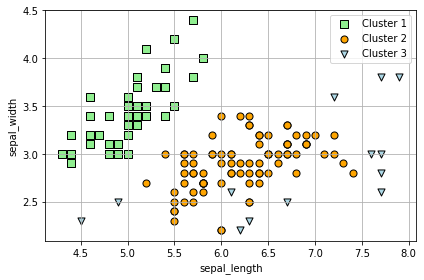

In [27]:
y_km = clustering.labels_
plt.scatter(X.loc[y_km == 0, X.columns[0]].values,
            X.loc[y_km == 0, X.columns[1]].values,
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X.loc[y_km == 1, X.columns[0]].values,
            X.loc[y_km == 1, X.columns[1]].values,
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X.loc[y_km == -1, X.columns[0]].values,
            X.loc[y_km == -1, X.columns[1]].values,
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('figures/10_02.png', dpi=300)
plt.show()